In [1]:
import numpy as np

file_path = "/home/wangsiyuan/ppq/working_ssd/data/ILSVRC2012_val_00000009.npy"

# 加载 .npy 文件
data = np.load(file_path)

# 打印 shape
print("Shape of the loaded .npy file:", data.shape)


Shape of the loaded .npy file: (3, 224, 224)


In [ ]:
import torch
from torchvision.models import resnet50

# Step 1: 加载预训练模型
model = resnet50(pretrained=True)
model.eval()  # 设置为评估模式

# Step 2: 创建一个示例输入
# ResNet-50 的输入大小为 [batch_size, 3, 224, 224]，其中 3 是 RGB 通道数
dummy_input = torch.randn(1, 3, 224, 224)

# Step 3: 导出为 ONNX 模型
onnx_file_path = "resnet50.onnx"
torch.onnx.export(
    model,                          # PyTorch 模型
    dummy_input,                    # 示例输入
    onnx_file_path,                 # 导出的 ONNX 文件路径
    export_params=True,             # 导出训练好的参数权重
    opset_version=13,               # ONNX opset 版本
    do_constant_folding=True,       # 是否进行常量折叠优化
    input_names=["input"],          # 输入节点名称
    output_names=["output"],        # 输出节点名称
    dynamic_axes={                  # 动态轴支持（可选）
        "input": {0: "batch_size"}, # 批量大小可以动态变化
        "output": {0: "batch_size"}
    }
)

print(f"Model exported to {onnx_file_path}")


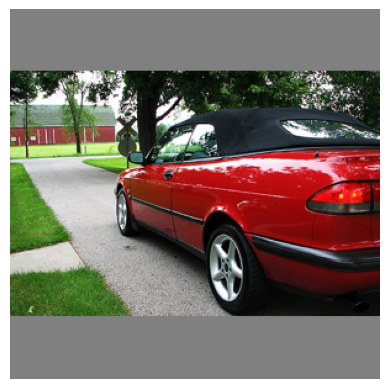

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 载入 .npy 文件
img_data = np.load('/home/wangsiyuan/ppq/working_ssd/data/000007.npy')

# 恢复图像形状，从 (C, H, W) 转换回 (H, W, C)
img_data = np.transpose(img_data, (1, 2, 0))

# 如果图像已归一化到 [0, 1]，需要反归一化回 [0, 255]
img_data = np.clip(img_data * 255, 0, 255).astype(np.uint8)

# 使用 matplotlib 显示图像
plt.imshow(img_data)
plt.axis('off')  # 不显示坐标轴
plt.show()
